In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display

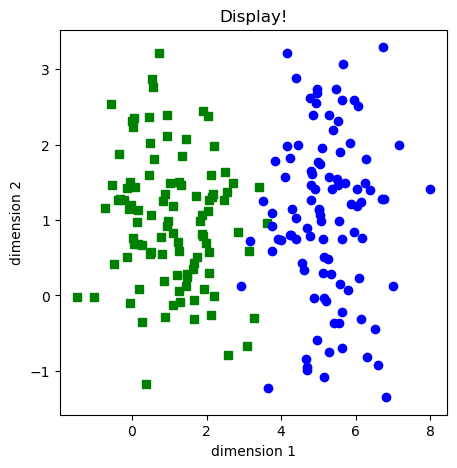

In [2]:
# create data

n_per_clust = 100
bias = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(n_per_clust)*bias , A[1]+np.random.randn(n_per_clust)*bias ]
b = [ B[0]+np.random.randn(n_per_clust)*bias , B[1]+np.random.randn(n_per_clust)*bias ]

# true labels
labels_np = np.vstack((np.zeros((n_per_clust,1)),np.ones((n_per_clust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'gs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'bo')
plt.title('Display!')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

In [3]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),   
    nn.ReLU(),        
    nn.Linear(1,1),   
    nn.Sigmoid()
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [4]:
# other model features
learning_rate = .01

# loss function
lossfun = nn.BCELoss()

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learning_rate)


In [5]:
# train the model
epochs = 1000
losses = torch.zeros(epochs)

for i in range(epochs):

  # forward pass
  y_hat = ANNclassify(data)

  # compute loss
  loss = lossfun(y_hat,labels)
  losses[i] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

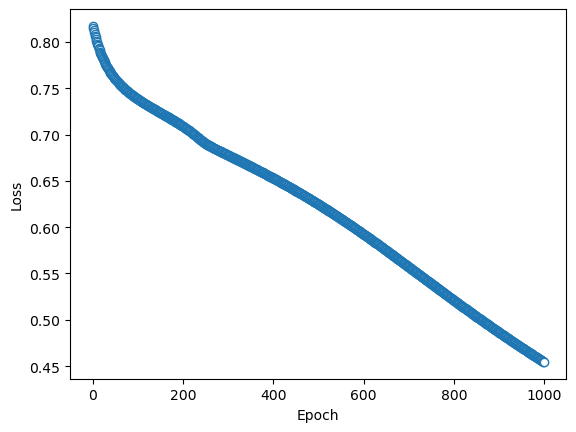

In [6]:
# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [7]:
# compute the predictions

# final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
total_acc = 100-100*len(misclassified)/(2*n_per_clust)

print('Final accuracy: %g%%' %total_acc)


Final accuracy: 95.5%


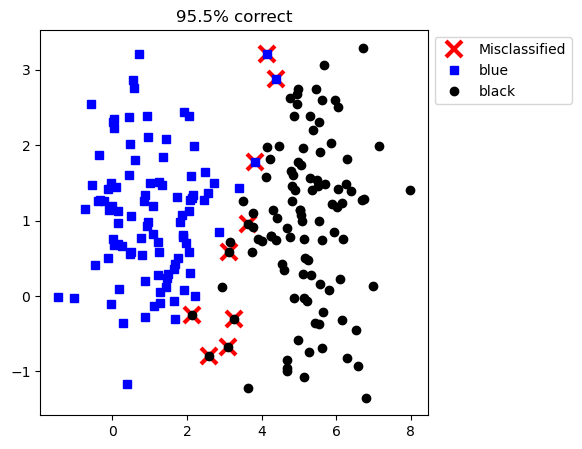

In [8]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{total_acc}% correct')
plt.show()